In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

##  Sinais e sistemas discretos

### Geração da forma de onda

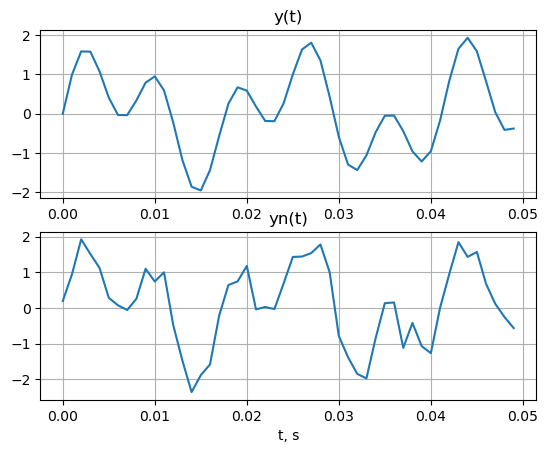

In [13]:

# geracao de forma de onda
fs=1000 # freq. amostragem, Hz
T=1 # duracao em segundos
t=np.arange(fs*T)/fs # tempo
f1=50 # freq sinal 1 em Hz
f2=120 # freq sinal 2 em Hz
pi = np.pi
y=np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)
yn=y+0.3*np.random.randn(len(t)) # y+ruido
dt=50 # faixa de observacao
plt.subplot(211)
plt.plot(t[:dt],y[:dt])
plt.title('y(t)')
plt.grid()
plt.subplot(212)
plt.plot(t[:dt],yn[:dt])
plt.title('yn(t)')
plt.grid()
plt.xlabel('t, s')
plt.show()

### Geração de Espectros

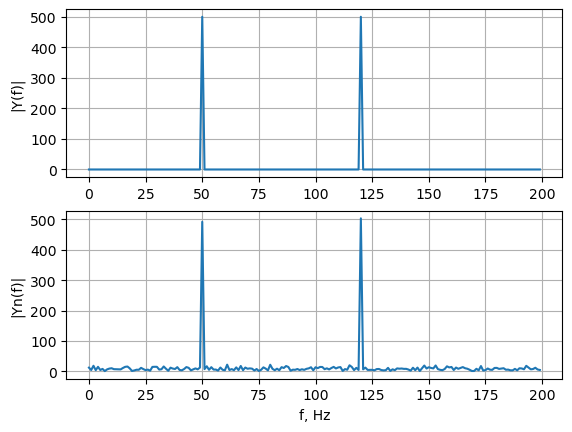

In [14]:

# geracao de espectros
Y=abs(np.fft.fft(y))
Yn=abs(np.fft.fft(yn))
f=np.arange(0,len(Y))*fs/len(Y)
# ou: f=arange(0,fs,fs/len(Y))
df=int(200*len(Y)/fs) # observação até 200Hz
plt.subplot(211)
plt.plot(f[:df],Y[:df])
plt.ylabel('|Y(f)|'), plt.grid()
plt.subplot(212)
plt.plot(f[:df],Yn[:df])
plt.ylabel('|Yn(f)|'), plt.grid()
plt.xlabel('f, Hz')
plt.show()

### Exemplo de sinal analogico de 95hz a 100hz

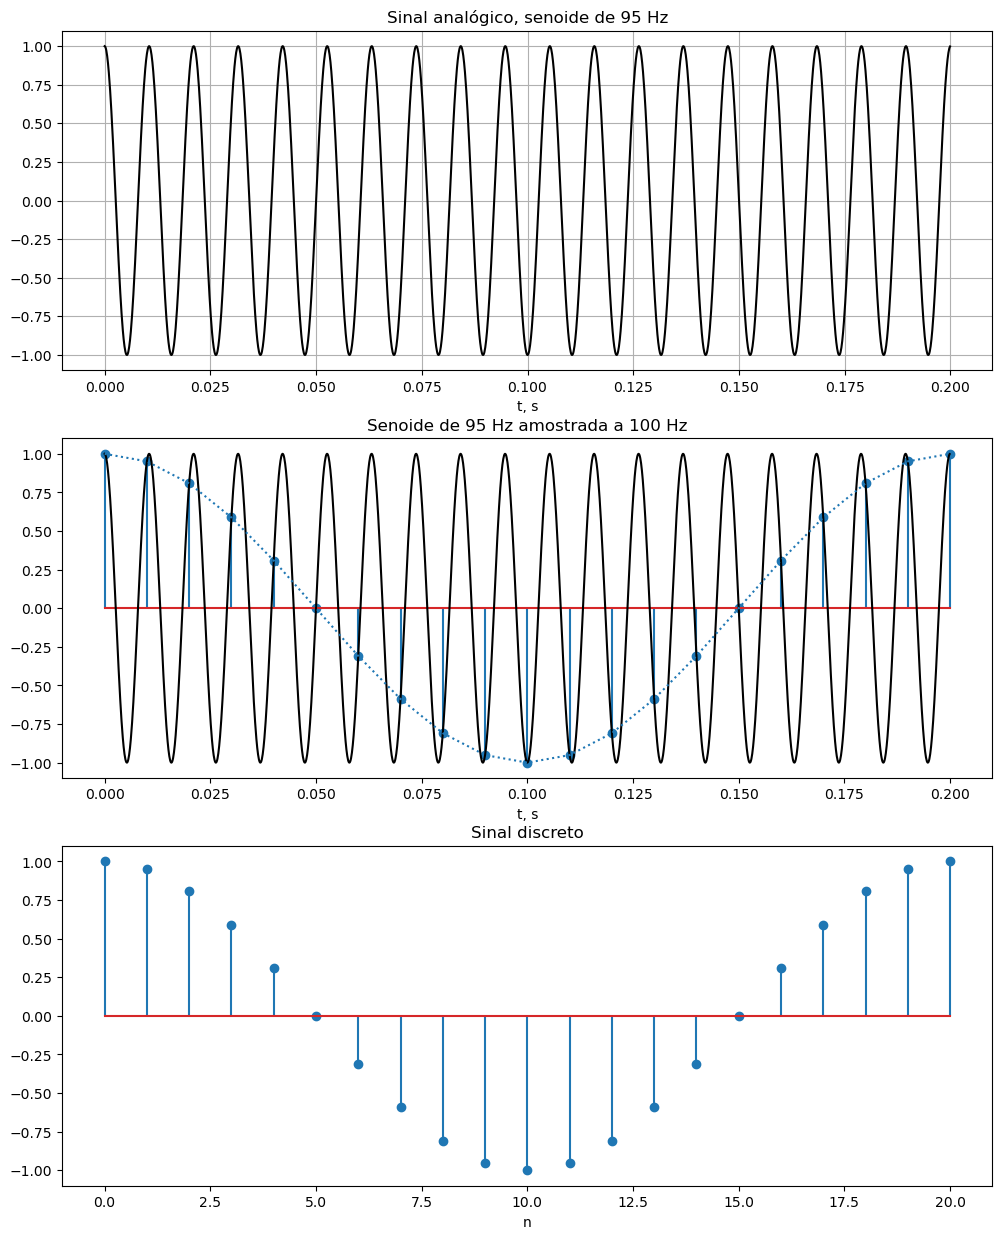

In [15]:
fs=100 # freq. amostragem, Hz
fa=95  # freq. sinal analógico, Hz
T=0.2  # duracao em segundos
t=np.arange(T*fs+1)/fs # tempo discreto
ta=np.arange(T*fs*100)/(fs*100) # tempo
pi = np.pi
sd=np.cos(2*pi*(fs-fa)*t)  # sinal discreto
sa=np.cos(2*pi*fa*ta)      # sinal analógico
plt.figure(figsize=(12,15))
plt.subplot(311)
plt.plot(ta,sa,color='k'), plt.grid()
plt.title("Sinal analógico, senoide de %g Hz" % fa)
plt.xlabel("t, s")
plt.subplot(312)
plt.stem(t,sd)
#plt.hold(True)
plt.plot(ta,sa,color='k')
plt.plot(t,sd, ':')
#plt.hold(False), plt.grid()
plt.xlabel("t, s")
plt.title("Senoide de %g Hz amostrada a %g Hz" % (fa, fs))
plt.subplot(313)
plt.stem(np.arange(T*fs+1),sd)
plt.title("Sinal discreto")
plt.xlabel("n")
plt.show()

### Convolução entre duas Sequencias Finitas

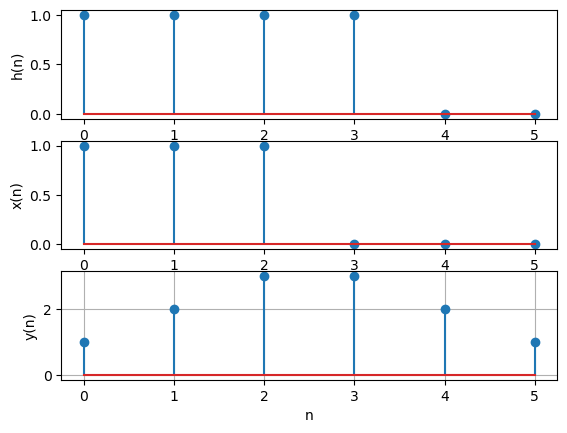

In [16]:
h=[1,1,1,1,0,0]
x=[1,1,1,0,0,0]
y=np.convolve(h,x)
n=np.arange(len(x))
plt.subplot(311),
plt.stem(n,h), plt.ylabel('h(n)'),
plt.subplot(312),
plt.stem(n,x), plt.ylabel('x(n)'),
plt.subplot(313),
plt.stem(n,y[:len(x)]), plt.ylabel('y(n)'),
plt.xlabel('n'), plt.grid()
plt.show()